## Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

## DataFrame erstellen

In [21]:
np.random.seed(42)
anzahl_kunden = 300
berufe = ['Lehrer', 'Ingenieur', 'Kaufmann', 'IT', 'Gesundheit', 'Handwerker']
wohnorte = ['Berlin', 'Hamburg', 'München', 'Köln', 'Leipzig']
produkte = ['Girokonto', 'Kreditkarte', 'Depot', 'Versicherung']
beschwerde_gruende = [
    "Hohe Gebühren",
    "Schlechter Kundenservice",
    "Technische Probleme",
    "Zu wenig Angebote",
    "Unklare Kommunikation",
    "Langsame App",
    "Probleme mit Kreditkarte",
    "Fehlende Beratung",
    "Zuviel Werbung"
]

In [23]:
df = pd.DataFrame({
    'Kundennummer': range(1, anzahl_kunden + 1),
    'Alter': np.random.randint(18, 70, size=anzahl_kunden),
    'Wohnort': np.random.choice(wohnorte, size=anzahl_kunden),
    'Beruf': np.random.choice(berufe, size=anzahl_kunden),
    'Produkt': np.random.choice(produkte, size=anzahl_kunden),
    'Kündigungsdatum': pd.to_datetime(
        np.random.choice(pd.date_range("2023-01-01", "2024-12-31"), size=anzahl_kunden)
    ),
    'Nutzungshäufigkeit': np.random.poisson(lam=15, size=anzahl_kunden),
})

In [29]:
def generiere_beschwerden():
    anzahl = np.random.choice([1, 2], p=[0.7, 0.3])  # 70% mit 1 Grund, 30% mit 2
    return "; ".join(random.sample(beschwerde_gruende, anzahl))

df['Beschwerden'] = [generiere_beschwerden() for _ in range(anzahl_kunden)]

In [104]:
df.head()

,Kundennummer,Alter,Wohnort,Beruf,Produkt,Kündigungsdatum,Nutzungshäufigkeit,Beschwerden,Monat,Altersgruppe
0,1,56,München,Lehrer,Depot,2023-08-16,17,Probleme mit Kreditkarte,2023-08,50-59
1,2,69,Berlin,Ingenieur,Depot,2023-08-04,12,Langsame App,2023-08,60-69
2,3,46,Berlin,Ingenieur,Depot,2024-11-26,12,Zuviel Werbung,2024-11,40-49
3,4,32,München,IT,Versicherung,2023-01-15,13,Zu wenig Angebote,2023-01,30-39
4,5,60,München,Lehrer,Kreditkarte,2023-06-06,22,Langsame App; Fehlende Beratung,2023-06,60-69


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Kundennummer        300 non-null    int64         
 1   Alter               300 non-null    int64         
 2   Wohnort             300 non-null    object        
 3   Beruf               300 non-null    object        
 4   Produkt             300 non-null    object        
 5   Kündigungsdatum     300 non-null    datetime64[ns]
 6   Nutzungshäufigkeit  300 non-null    int64         
 7   Beschwerden         300 non-null    object        
 8   Monat               300 non-null    period[M]     
 9   Altersgruppe        292 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(3), object(4), period[M](1)
memory usage: 21.7+ KB


In [114]:
kunden_mit_nan = df[df.isnull().any(axis=1)]
kunden_mit_nan.head(8)

,Kundennummer,Alter,Wohnort,Beruf,Produkt,Kündigungsdatum,Nutzungshäufigkeit,Beschwerden,Monat,Altersgruppe
101,102,18,Köln,Ingenieur,Girokonto,2024-09-21,11,Zu wenig Angebote,2024-09,NaN
106,107,18,München,Gesundheit,Versicherung,2023-12-26,18,Probleme mit Kreditkarte,2023-12,NaN
138,139,18,Hamburg,Ingenieur,Kreditkarte,2024-04-02,14,Unklare Kommunikation; Hohe Gebühren,2024-04,NaN
144,145,18,Leipzig,Handwerker,Girokonto,2023-06-27,18,Langsame App; Schlechter Kundenservice,2023-06,NaN
193,194,18,München,Lehrer,Kreditkarte,2023-09-13,14,Technische Probleme,2023-09,NaN
235,236,18,Leipzig,IT,Versicherung,2024-11-07,10,Unklare Kommunikation,2024-11,NaN
278,279,18,Leipzig,Ingenieur,Kreditkarte,2023-03-10,17,Hohe Gebühren; Langsame App,2023-03,NaN
295,296,18,Leipzig,Lehrer,Kreditkarte,2023-10-23,25,Probleme mit Kreditkarte,2023-10,NaN


## Als .csv speichern

In [35]:
df.to_csv("kuendigungen_synthetisch.csv", index=False)

## Analyse

### Wie viele Kündigungen pro Monat?

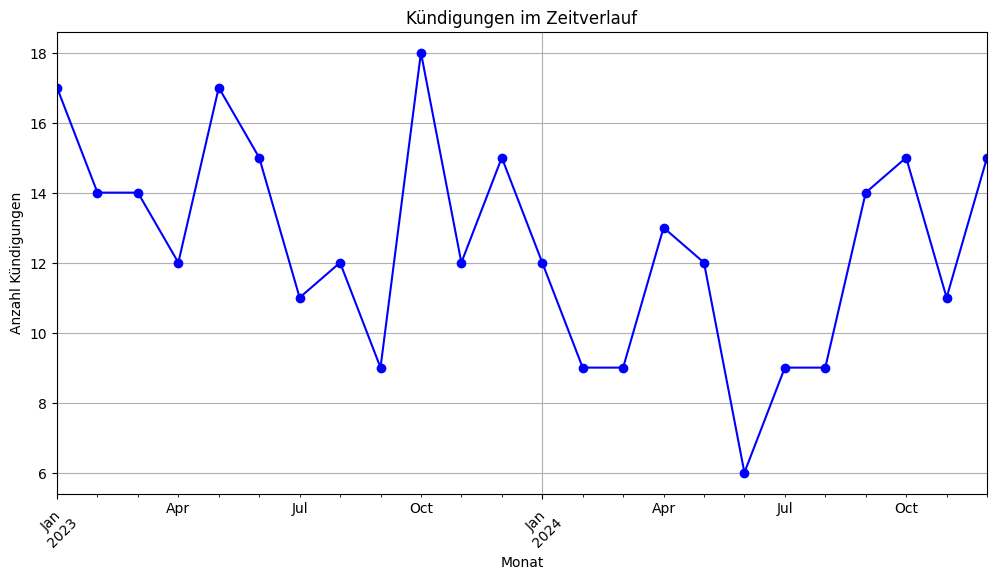

In [53]:
df['Monat'] = df['Kündigungsdatum'].dt.to_period('M')
kuendigungen_pro_monat = df.groupby('Monat').size()
plt.figure(figsize=(12, 6))
kuendigungen_pro_monat.plot(kind='line', marker='o', color='b')

plt.title('Kündigungen im Zeitverlauf')
plt.xlabel('Monat')
plt.ylabel('Anzahl Kündigungen')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Welche Berufe kündigen am häufigsten?

<Figure size 1200x600 with 0 Axes>

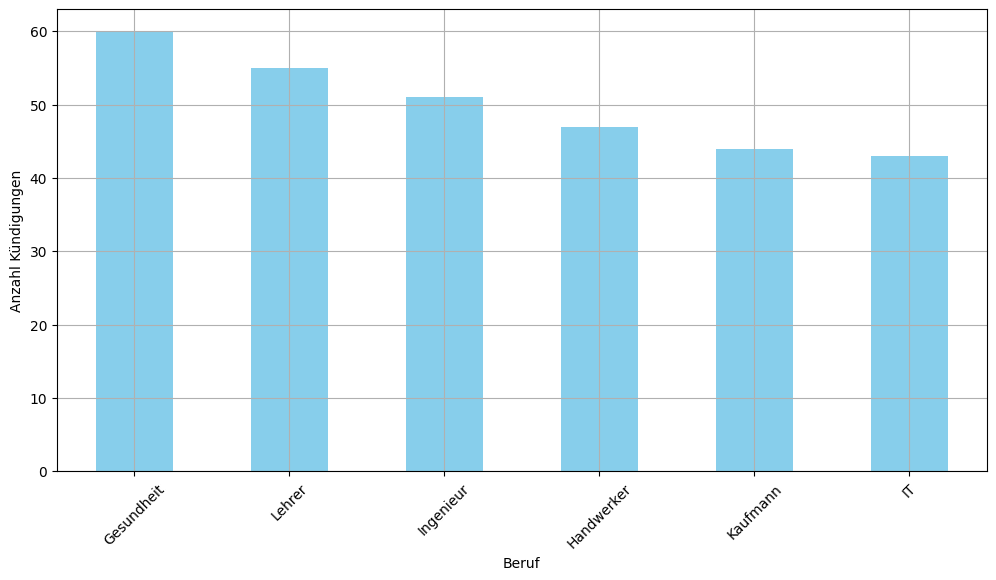

In [63]:
berufe = df['Beruf'].value_counts()
plt.figure(figsize=(12, 6))
berufe.plot(kind='bar', color='skyblue')
plt.xlabel('Beruf')
plt.ylabel('Anzahl Kündigungen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gründe der Kündigungen

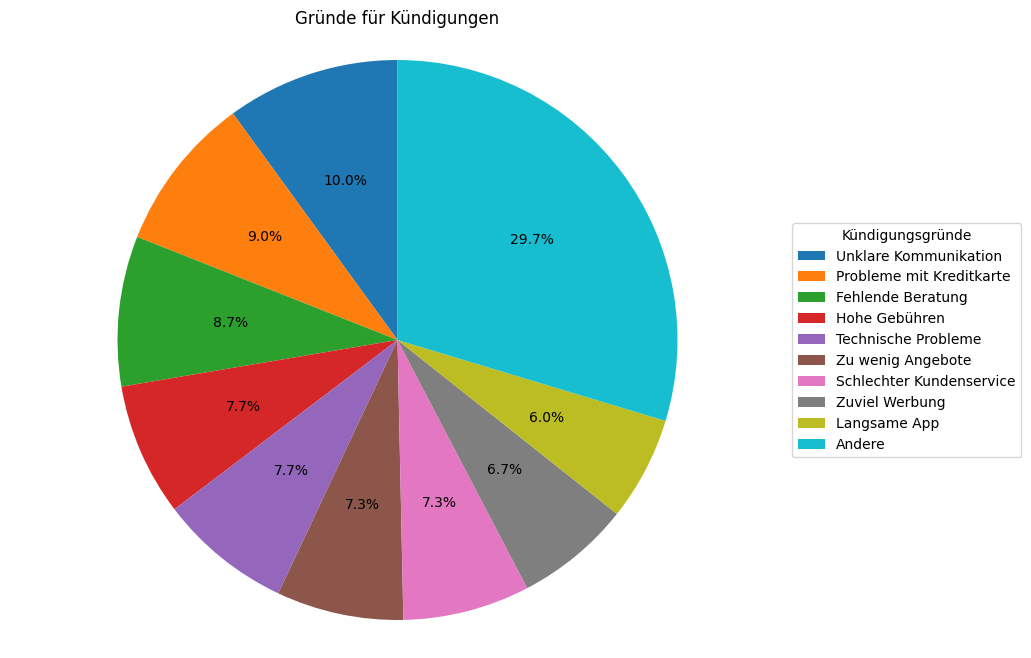

In [80]:
gruende = df['Beschwerden'].value_counts()

gesamt = gruende.sum()
haeufige_gruende = gruende[gruende / gesamt >= 0.015]
seltene_gruende_summe = gruende[gruende / gesamt < 0.051].sum()
if seltene_gruende_summe > 0:
    haeufige_gruende['Andere'] = seltene_gruende_summe

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    haeufige_gruende,
    autopct='%1.1f%%',
    startangle=90)

plt.legend(wedges, haeufige_gruende.index, title='Kündigungsgründe', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Gründe für Kündigungen')
plt.axis('equal')
    
plt.show()

In [82]:
gruende_prozent = (gruende / gesamt * 100).round(1)
gruende_tabelle = pd.DataFrame({
    'Anzahl': gruende,
    'Prozent': gruende_prozent.astype(str) + ' %'
})
gruende_tabelle = gruende_tabelle.sort_values(by='Anzahl', ascending=False)
print(gruende_tabelle)

                                                    Anzahl Prozent
Beschwerden                                                       
Unklare Kommunikation                                   30  10.0 %
Probleme mit Kreditkarte                                27   9.0 %
Fehlende Beratung                                       26   8.7 %
Hohe Gebühren                                           23   7.7 %
Technische Probleme                                     23   7.7 %
Zu wenig Angebote                                       22   7.3 %
Schlechter Kundenservice                                22   7.3 %
Zuviel Werbung                                          20   6.7 %
Langsame App                                            18   6.0 %
Technische Probleme; Hohe Gebühren                       4   1.3 %
Probleme mit Kreditkarte; Hohe Gebühren                  4   1.3 %
Probleme mit Kreditkarte; Zuviel Werbung                 4   1.3 %
Hohe Gebühren; Probleme mit Kreditkarte                  3   1

### Welche Produkten sind am meisten betroffen?

In [87]:
produkte = df['Produkt'].value_counts()
produkte_gesamt = produkte.sum()
produkte_prozent = (produkte / produkte_gesamt * 100).round(1)
produkte_tabelle = pd.DataFrame({
    'Anzahl': produkte,
    'Prozent': produkte_prozent.astype(str) + ' %'
})
produkte_tabelle = produkte_tabelle.sort_values(by='Anzahl', ascending=False)
print(produkte_tabelle)

              Anzahl Prozent
Produkt                     
Kreditkarte       83  27.7 %
Depot             82  27.3 %
Girokonto         72  24.0 %
Versicherung      63  21.0 %


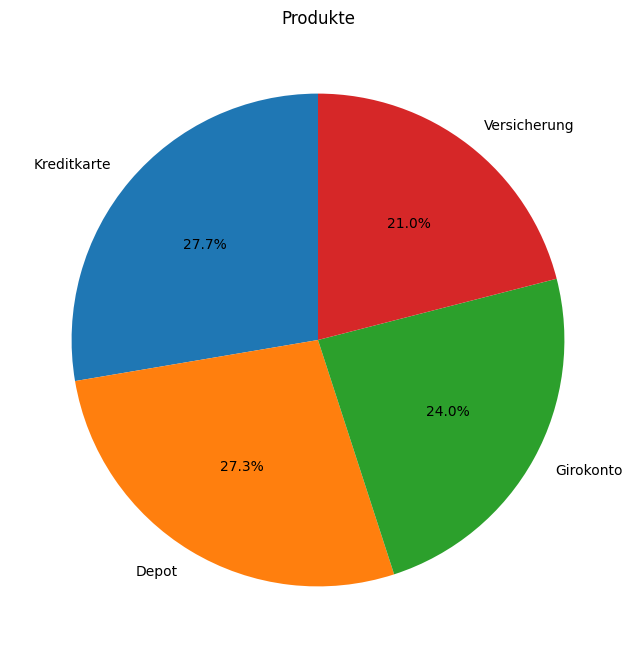

In [91]:
plt.figure(figsize=(8, 8))
plt.pie(
    produkte,
    labels=produkte.index,               # Produktnamen direkt im Kreis
    autopct='%1.1f%%',                   # Prozentangaben im Kreis
    startangle=90
)
plt.title('Produkte')
plt.show()

### Alter vs. Produkt

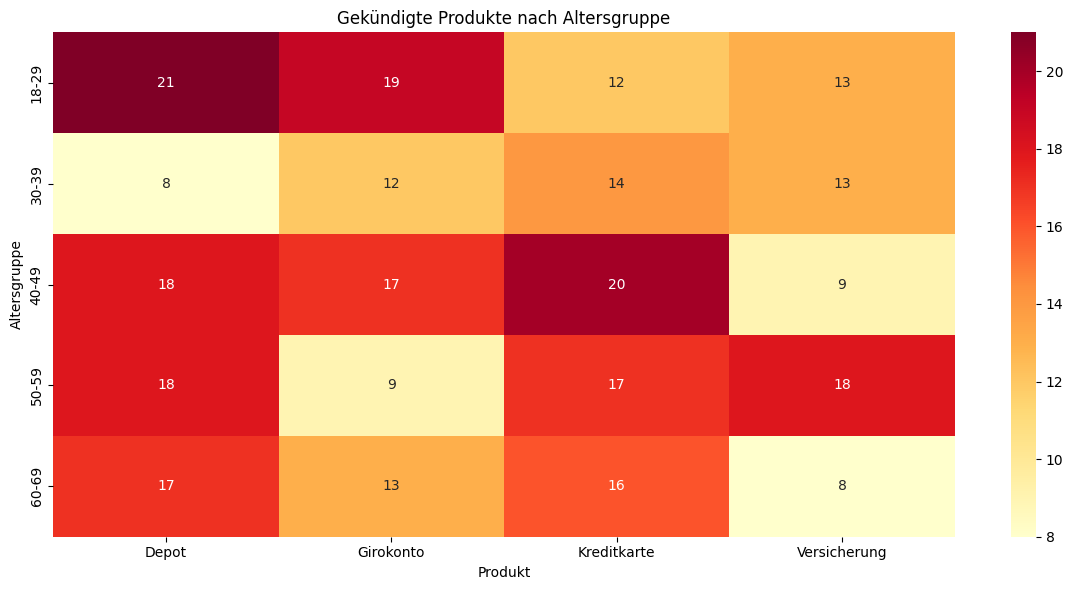

In [118]:
df['Altersgruppe'] = pd.cut(
    df['Alter'],
    bins=[18, 29, 39, 49, 59, 69, 80, np.inf],
    labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-80', 'NaN']
)

heatmap_data = pd.crosstab(df[df['Altersgruppe'] != 'NaN']['Altersgruppe'], df['Produkt'])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Gekündigte Produkte nach Altersgruppe')
plt.xlabel('Produkt')
plt.ylabel('Altersgruppe')
plt.tight_layout()
plt.show()